# Joe Biden Stock Portfolio

## Lithium, Cobalt, Nickel and Graphite, and Battery Recycling 

https://en.wikipedia.org/wiki/Joe_Biden

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY', 'ZEV','GP','UMICY','ABML', 'LICY']
start = '2021-01-20'
end = '2022-03-25'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,ABML,GP,LICY,SPY,UMICY,ZEV
Date,,,,,,
2021-01-20,1.940,30.650000,12.17,377.666901,14.136186,16.450001
2021-01-21,2.305,30.379999,12.10,378.011169,14.599505,16.010000
2021-01-22,3.335,30.209999,12.50,376.673248,14.234763,16.280001
2021-01-25,4.075,30.250000,12.79,378.158752,14.431921,15.520000
2021-01-26,3.980,30.330000,12.30,377.568481,14.688226,15.670000


In [3]:
df.tail()

,ABML,GP,LICY,SPY,UMICY,ZEV
Date,,,,,,
2022-03-18,0.963,5.94,9.25,444.519989,10.60,5.85
2022-03-21,0.970,5.95,8.49,444.390015,10.47,5.82
2022-03-22,1.000,6.39,8.61,449.589996,10.53,5.87
2022-03-23,1.040,6.54,8.40,443.799988,10.75,5.70
2022-03-24,1.090,7.18,7.93,450.489990,10.61,6.02


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

1 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
ABML: 20000.0
GP: 20000.0
LICY: 20000.0
SPY: 20000.0
UMICY: 20000.0


In [8]:
print('Number of Shares:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
ABML: 10309
GP: 652
LICY: 1643
SPY: 52
UMICY: 1414


In [9]:
print('Beginning Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
ABML: $19999.46
GP: $19983.8
LICY: $19995.31
SPY: $19638.68
UMICY: $19988.57


In [10]:
print('Current Value:')
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
ABML: $11236.81
GP: $4681.36
LICY: $13028.99
SPY: $23425.48
UMICY: $15002.54


In [11]:
result = []
percent_invest = [0.20, 0.20, 0.20, 0.20, 0.20]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $67375.18


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: ABML: -43.81%
Holding Period Return: GP: -76.57000000000001%
Holding Period Return: LICY: -34.839999999999996%
Holding Period Return: SPY: 19.28%
Holding Period Return: UMICY: -24.94%
Holding Period Return: ZEV: -63.4%


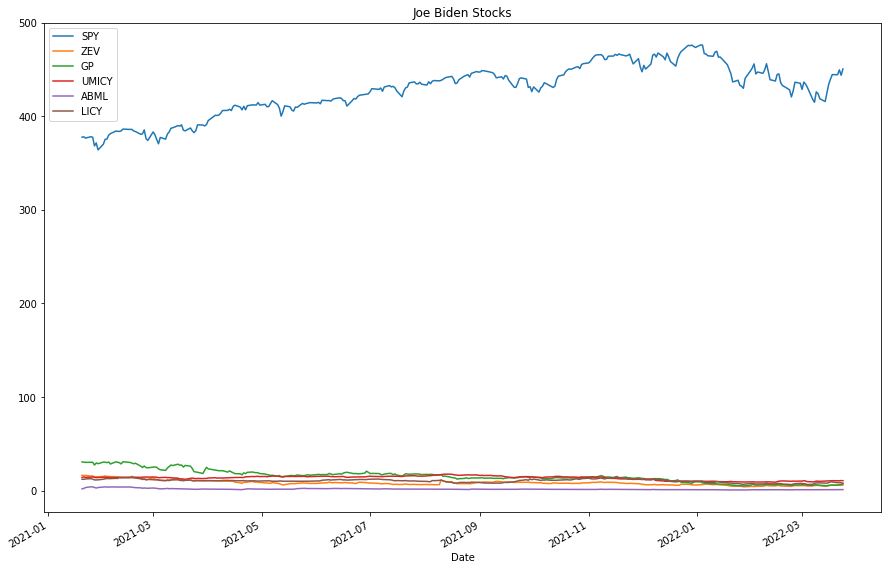

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Joe Biden Stocks')
plt.legend()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

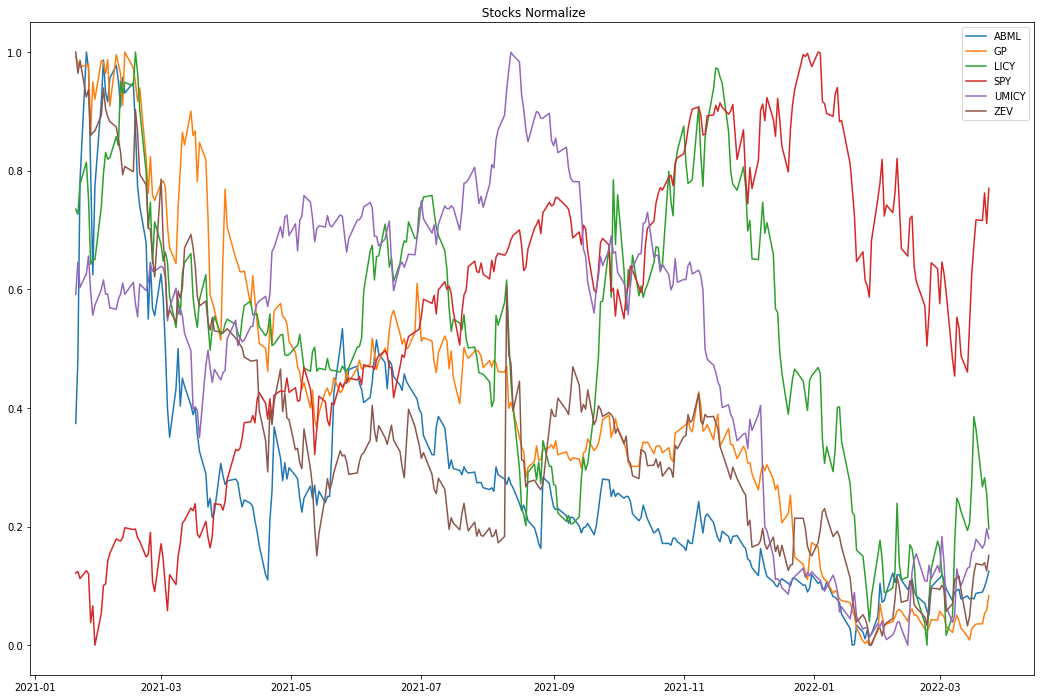

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
df.min()

ABML       0.665000
GP         5.020000
LICY       6.390000
SPY      364.070923
UMICY      9.070000
ZEV        4.160000
dtype: float64

In [17]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 476.23052978515625
ZEV: 16.450000762939453
GP: 30.84000015258789
UMICY: 17.63240623474121
ABML: 4.074999809265137
LICY: 14.25


In [18]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,ZEV Return,GP Return,UMICY Return,ABML Return,LICY Return
Date,,,,,,
2021-01-21,0.000912,-0.026748,-0.008809,0.032775,0.188144,-0.005752
2021-01-22,-0.003539,0.016864,-0.005596,-0.024983,0.446855,0.033058
2021-01-25,0.003944,-0.046683,0.001324,0.013850,0.221889,0.023200
2021-01-26,-0.001561,0.009665,0.002645,0.017760,-0.023313,-0.038311


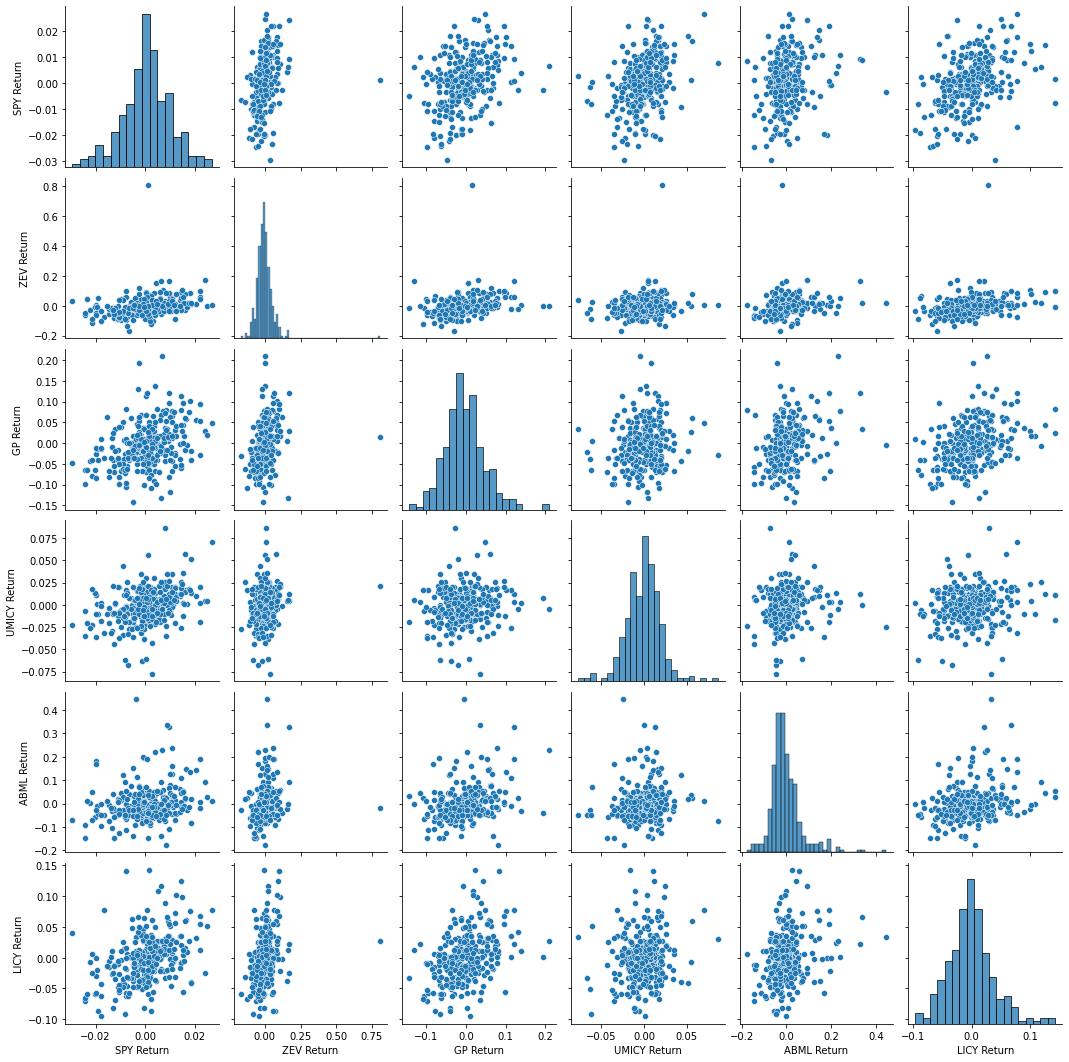

In [19]:
sns.pairplot(returns[1:] )

In [20]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return     2022-03-09
ZEV Return     2021-08-10
GP Return      2022-02-01
UMICY Return   2021-03-22
ABML Return    2021-01-22
LICY Return    2021-09-29
dtype: datetime64[ns]


In [21]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return     2022-03-07
ZEV Return     2021-08-17
GP Return      2021-03-24
UMICY Return   2021-12-08
ABML Return    2021-01-28
LICY Return    2022-02-10
dtype: datetime64[ns]


In [22]:
returns.corr()

,SPY Return,ZEV Return,GP Return,UMICY Return,ABML Return,LICY Return
SPY Return,1.000000,0.288977,0.342873,0.354914,0.198793,0.402380
ZEV Return,0.288977,1.000000,0.279209,0.139035,0.202506,0.282774
GP Return,0.342873,0.279209,1.000000,0.154570,0.284564,0.375946
UMICY Return,0.354914,0.139035,0.154570,1.000000,0.114504,0.132592
ABML Return,0.198793,0.202506,0.284564,0.114504,1.000000,0.250125
LICY Return,0.402380,0.282774,0.375946,0.132592,0.250125,1.000000


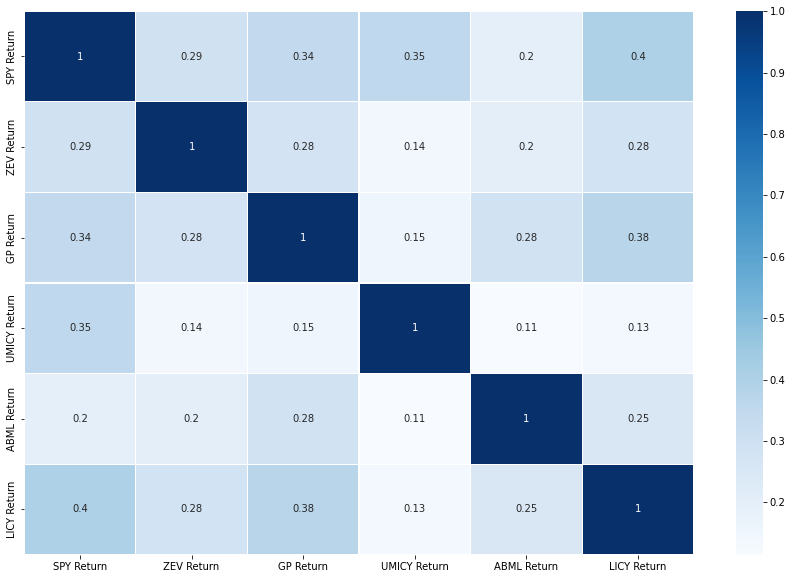

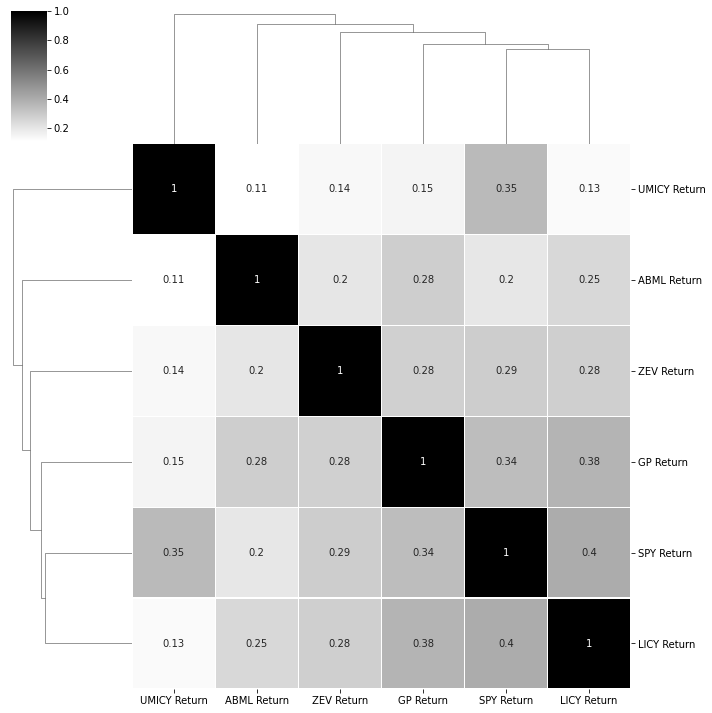

In [23]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

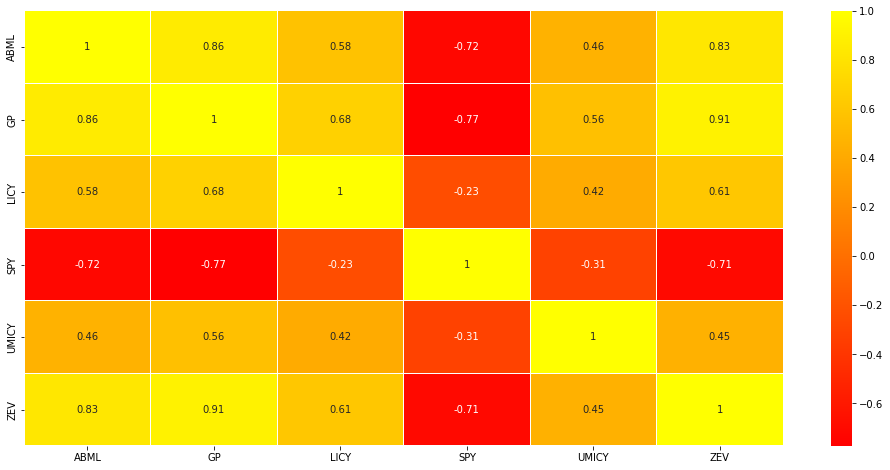

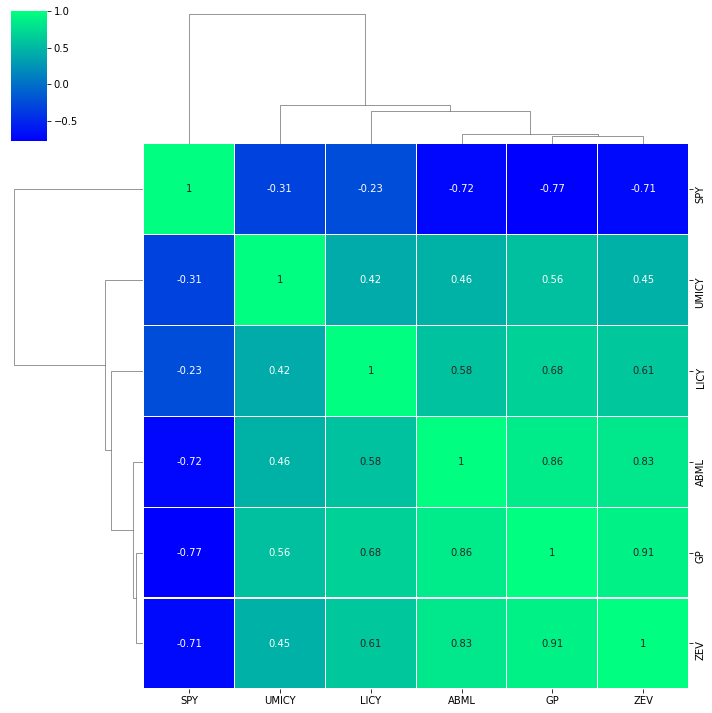

In [24]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [25]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [26]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [27]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  -------------------------------------------------------------------------
90%                 [-0.09443703 -0.06852204 -0.05007689 -0.01153275 -0.02633243 -0.08863299]
95%                 [-0.12138036 -0.08692506 -0.06407222 -0.01498327 -0.03358009 -0.11334971]
99%                 [-0.17192157 -0.12144608 -0.09032514 -0.02145588 -0.04717551 -0.15971416]


In [28]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
ABML: -0.0944
GP: -0.0685
LICY: -0.0501
SPY: -0.0115
UMICY: -0.0263
ZEV: -0.0886


In [29]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
ABML: $9440.0
GP: $6850.000000000001
LICY: $5010.0
SPY: $1150.0
UMICY: $2630.0
ZEV: $8860.0


In [30]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
ABML: $17190.0
GP: $12140.0
LICY: $9030.0
SPY: $2150.0
UMICY: $4720.0
ZEV: $15970.0
